In [43]:
import  networkx as nx

# G = nx.Graph()
# er = nx.erdos_renyi_graph(100, 0.15)
# ws = nx.watts_strogatz_graph(30, 3, 0.1)
n_nodes=100
ba = nx.barabasi_albert_graph(n_nodes, 1)
# red = nx.random_lobster(20, 0.5, 0.9)
# print(nx.average_degree_connectivity(ba))
# print(nx.number_of_edges(ba))
# print(nx.degree(ba))
#import time
#time.sleep(0.5)

In [44]:
cont_endponint=0
cont_server=0
cont_router=0
SRV_CMP_PWR = 1000
#capacity of links
SRV_LINK_CAP = 150
RUT_LINK_CAP = 200
EP_LINK_CAP = 100

#cost of using the links
SRV_LINK_COST = 10
RUT_LINK_COST = 15
EP_LINK_COST = 5

# Iterate over end nodes:
for v in nx.degree(ba):
    #if node connects only to one neighbour
    if v[1] == 1:
        
        #mark as endpoint and add numer:
        cont_endponint+=1
        ba.nodes[v[0]]['type'] = 'Ep'+str(cont_endponint)       
        
        #add parameters of connection
        adj = list(nx.neighbors(ba, v[0]))        
        ba[v[0]][adj[0]]['capacity'] = EP_LINK_CAP
        ba[v[0]][adj[0]]['cost'] = EP_LINK_COST        
        #if node has more connection choose whether is Server or router
    else:        
        ba.nodes[v[0]]['type'] = 'Router' if v[0] % 2 == 0 else 'Server'       
        
for v in nx.degree(ba): 
    #add parameters of connection
    adj = list(nx.neighbors(ba, v[0]))
    if v[1] != 1:
        for neig in adj:            
            if ba.nodes[v[0]]['type'] == 'Router' and ba.nodes[neig]['type'] == 'Server':                               
                ba[v[0]][neig]['capacity'] = SRV_LINK_CAP
                ba[v[0]][neig]['cost'] = RUT_LINK_COST
            if ba.nodes[v[0]]['type'] == 'Server' and ba.nodes[neig]['type'] == 'Router':                               
                ba[v[0]][neig]['capacity'] = SRV_LINK_CAP
                ba[v[0]][neig]['cost'] = RUT_LINK_COST
            if ba.nodes[v[0]]['type'] == 'Server' and ba.nodes[neig]['type'] == 'Server':                               
                ba[v[0]][neig]['capacity'] = SRV_LINK_CAP
                ba[v[0]][neig]['cost'] = SRV_LINK_COST
            if ba.nodes[v[0]]['type'] == 'Router' and ba.nodes[neig]['type'] == 'Router':                               
                ba[v[0]][neig]['capacity'] = RUT_LINK_CAP
                ba[v[0]][neig]['cost'] = RUT_LINK_COST                
        #add numer of router and numer of server
        for neig in adj:           
            if ba.nodes[v[0]]['type'] == 'Router':
                cont_router+=1
                ba.nodes[v[0]]['type'] = 'R'+str(cont_router)                             
            if ba.nodes[v[0]]['type'] == 'Server':
                cont_server+=1
                ba.nodes[v[0]]['type'] = 'S'+str(cont_server)                
                
print ('-Numer of endpoints:', cont_endponint,', -Numer of routers:',cont_router,', -Numer of servers:',cont_server)

-Numer of endpoints: 65 , -Numer of routers: 18 , -Numer of servers: 17


In [45]:
import pandas as pd
#create dataframe
data = pd.DataFrame([], columns=['From_index','To_index','From_type','To_type','Cost','Capacity'])
for v in nx.degree(ba): 
    adj = list(nx.neighbors(ba, v[0]))
    for neig in adj:                      
        data = data.append(pd.DataFrame([[v[0]+1,neig+1,ba.nodes[v[0]]['type'],ba.nodes[neig]['type'],ba[v[0]][neig]['cost'],ba[v[0]][neig]['capacity']]], columns=['From_index','To_index','From_type','To_type','Cost','Capacity']), ignore_index = True) 
        #print(v[0],'-',neig,'|',ba.nodes[v[0]]['type'],'-',ba.nodes[neig]['type'],10,'|',ba[v[0]][neig]['capacity'])        
#add index route
data['route_id'] = data.index+1
data.to_csv('network.csv')

In [46]:
data.head(len(data))

,From_index,To_index,From_type,To_type,Cost,Capacity,route_id
0,1,2,R1,S1,15,150,1
1,1,3,R1,R2,15,200,2
2,1,4,R1,S2,15,150,3
3,1,5,R1,R3,15,200,4
4,1,8,R1,Ep1,5,100,5
5,1,10,R1,S4,15,150,6
6,1,14,R1,S5,15,150,7
7,1,15,R1,R6,15,200,8
8,1,17,R1,R7,15,200,9
9,1,18,R1,S7,15,150,10


In [47]:
Network = nx.Graph()
Network.add_nodes_from([1, n_nodes])
for i in range(len(data)):
    Network.add_edge(data['From_index'][i], data['To_index'][i])

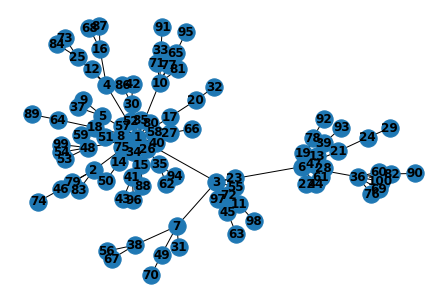

In [48]:
import matplotlib.pyplot as plt
nx.draw(Network, with_labels=True, font_weight='bold', pos=nx.spring_layout(Network))
plt.savefig("path.png")
plt.show()

In [49]:
Vn=n_nodes
En=0
for i in range(len(data)): 
    if En <= data['route_id'][i]:
        En = data['route_id'][i]

In [51]:
with open("data.dat", "w") as f:
    f.write("""
data;
#-----------------------------------------------------------------------
#liczba łuki, zapotrzebowań oraz ścieżek

param Vn := {Vn};
param En := {En};
param Dn := {Dn};
#-----------------------------------------------------------------------
#rozmiar zapotrzebowania d, węzeł żródłowy d, węzeł docelowy d

param : h  s  t :=
 1      {h} {s} {t}
;
        """.format(Vn=Vn, En=En, Dn=1, h=1, s=1, t=90))

with open("data.dat", "a") as f:
    f.write("""
#-----------------------------------------------------------------------
#węzłe-łącze  Aev(e,v) 
param : A :=
""")

    for i in range(En):       
        f.write("""  {link_number}  {From_edge_number}    1
""".format(link_number=data['route_id'][i], From_edge_number=data['From_index'][i]))
    f.write(""";""")
    
with open("data.dat", "a") as f:
    f.write("""

#----------------------------------------------------------------------- 
#węzłe-łącze  Bev(e,v) 
param : B :=
""")
        
    for i in range(En):       
        f.write("""  {link_number}  {to_edge_number}    1
""".format(link_number=data['route_id'][i], to_edge_number=data['To_index'][i]))
    f.write(""";""")
    
with open("data.dat", "a") as f:
    f.write("""

#-----------------------------------------------------------------------       
#koszt jednostkowy użycia przepływności na łączach     
param : K :=
""")
    for i in range(En):       
        f.write("""  {link_number}  {cost}
""".format(link_number=data['route_id'][i], cost=data['Cost'][i]))
    f.write(""";""")
        
with open("data.dat", "a") as f:
    f.write("""
    
#----------------------------------------------------------------------- 
#upper bound for the degree of transit node v     
param : G :=
""")
    for i in range(1,Vn+1):       
        f.write("""  {node_number}  {grade}
""".format(node_number=i, grade=Network.degree[i]))        
    f.write(""";""")
        
with open("data.dat", "a") as f:
     f.write("""
end;
""")

In [24]:
with open("data.dat", "w") as f:
    f.write("""
data;
#-----------------------------------------------------------------------
#liczba łuki, zapotrzebowań oraz ścieżek

param Vn := {Vn};
param En := {En};
param Dn := {Dn};
#-----------------------------------------------------------------------
#rozmiar zapotrzebowania d, węzeł żródłowy d, węzeł docelowy d

param : h  s  t :=
 1      {h} {s} {t}
;
        """.format(Vn=Vn, En=En, Dn=1, h=1, s=1, t=5))

In [25]:
with open("data.dat", "a") as f:
    f.write("""
#-----------------------------------------------------------------------
#węzłe-łącze  Aev(e,v) 
param : A :=
""")

    for i in range(En):       
        f.write("""  {link_number}  {From_edge_number}    1
""".format(link_number=data['route_id'][i], From_edge_number=data['From_index'][i]))
    f.write(""";""")

In [26]:
with open("data.dat", "a") as f:
    f.write("""

#----------------------------------------------------------------------- 
#węzłe-łącze  Bev(e,v) 
param : B :=
""")
        
    for i in range(En):       
        f.write("""  {link_number}  {to_edge_number}    1
""".format(link_number=data['route_id'][i], to_edge_number=data['To_index'][i]))
    f.write(""";""")

In [27]:
with open("data.dat", "a") as f:
    f.write("""

#-----------------------------------------------------------------------       
#koszt jednostkowy użycia przepływności na łączach     
param : K :=
""")
    for i in range(En):       
        f.write("""  {link_number}  {cost}
""".format(link_number=data['route_id'][i], cost=data['Cost'][i]))
    f.write(""";""")

In [31]:
with open("data.dat", "a") as f:
    f.write("""
    
#----------------------------------------------------------------------- 
#upper bound for the degree of transit node v     
param : G :=
""")
    for i in range(1,Vn+1):       
        f.write("""  {node_number}  {grade}
""".format(node_number=i, grade=Network.degree[i]))        
    f.write(""";""")

In [30]:
with open("data.dat", "a") as f:
     f.write("""
end;
""")